# Question 1 - Monte Carlo Integration
Given integrand,
$$f(x)=\frac{1}{1+x^2}$$
This will be integrated within the range $[0,1]$ using weight functions $\omega(x)$ = 1 and $\omega(x)$ = $\frac{1}{3}[4-2x]$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import pandas as pd
%matplotlib inline

In [2]:
def f1(x):
    return 1/(1+x**2)

def w(x):
    return (4-2*x)/3

def f_by_w(y):
    x = 2 - np.sqrt(4 - 3*y)
    return f1(x)/w(x)

In [3]:
def int_w(init,fin,N,f): # This function returns the integral and sigma given a function.
    # init = initial x
    # fin = final x
    # N = seed
    # if f is f1, w = 1, if f is f_by_w, w = (4-2x)/3
    rand_list = np.random.uniform(init,fin,N)
    sum_1 = 0
    sum_2 = 0
    for k in rand_list:
        sum_1 = sum_1 + f(k)
        sum_2 = sum_2 + f(k)**2
    avg_f = sum_1/N
    avg_v = sum_2/N
    
    int_val = (fin-init)*avg_f
    var_val = (1/N)*((fin-init)*avg_v - ((fin-init)*avg_f)**2)
    
    return np.array([int_val,var_val])

In [6]:
int_w(0,1,10,f1)

array([0.763214  , 0.00315622])

In [19]:
result = np.zeros((9,5))
N = [10,20,50,100,200,500,1000,2000,5000]
for i in range(len(N)):
    result[i][0] = N[i]
    result[i][1] = int_w(0,1,N[i],f1)[0]
    result[i][2] = int_w(0,1,N[i],f1)[1]
    result[i][3] = int_w(0,1,N[i],f_by_w)[0]
    result[i][4] = int_w(0,1,N[i],f_by_w)[1]

In [20]:
result_pd=pd.DataFrame(result,columns = ["N","w(x) = 1, I","$\sigma_{I}$","w(x) = (4-2x)/3, I","$\sigma_{I}$"])

In [21]:
# The following table gives the comparison with and without using the weight function.
result_pd

,N,"w(x) = 1, I",$\sigma_{I}$,"w(x) = (4-2x)/3, I",$\sigma_{I}$
0,10.0,0.667240,0.001775,0.778137,2.789469e-05
1,20.0,0.789872,0.001381,0.780950,2.150061e-05
2,50.0,0.786806,0.000545,0.787401,8.214687e-06
3,100.0,0.794609,0.000308,0.779941,3.241891e-06
4,200.0,0.803217,0.000122,0.787016,1.971921e-06
5,500.0,0.790315,0.000054,0.784328,7.839785e-07
6,1000.0,0.785814,0.000025,0.784773,3.878563e-07
7,2000.0,0.783216,0.000013,0.785387,2.048290e-07
8,5000.0,0.781879,0.000005,0.785941,8.018559e-08


# Question 2 - Metropolis algorithm

The Metropolis algorithm will be studied in this section to integrate,
$$\int_{\infty}^{\infty}x^2e^{-x^2/2}$$
Here, $e^{-x^2/2}$ will act as the weight function and points will be generated using the metropolis algorithm according to this function. The weight function also needs to be normalized and hence, the integrand will be multiplied and divided by $2\pi$. 

These generated points will then be used to average $x^2$ to get the value of the integral. The acceptance ratio will be calculated and the autocorrelation function will be plotted. A comparison of the value of the integral with this method and using the above monte carlo will be shown in the end.

In [5]:
# Generating wrt w(x)
def weight(x):
    return np.e**(-(x**2)/2)

def metropolis(N,d,ini): # Function for the metropolis algorithm
    # This function generates points distributed by the weight function
    x_fin = []
    x_fin.append(ini)
    c_acc = 0
    for i in range(N):
        temp = np.random.uniform(0,1)
        if (temp < 0.5):
            x_temp = x_fin[i] - d
        elif (temp > 0.5 or temp == 0.5):
            x_temp = x_fin[i] + d
        r = weight(x_temp)/weight(x_fin[i])
        if (r > 1 or r == 1):
            c_acc = c_acc + 1
            x_fin.append(x_temp)
            continue
        if (r < 1):
            eta = np.random.uniform(0,1)
            if (r > eta):
                c_acc = c_acc + 1
                x_fin.append(x_temp)
            if (r < eta):
                x_fin.append(x_fin[i])
    acc_ratio = c_acc/len(x_fin)
    return np.array([np.array(x_fin),acc_ratio],dtype = object)

# Function to be averaged with the generated points 
def f(x):
    return (x**2)

def met_int(N,d,ini): # This is to integrate the function and find the acceptance ratio
    domain = metropolis(N,d,ini)[0]
    sum_ = 0
    #normalization of weight function.
    norm = np.sqrt(2*np.pi)
    
    for i in domain:
        sum_ = sum_ + f(i)
    plt.hist(domain)
    print('Value of the integral is',norm*(sum_/np.size(domain)))
    print('Acceptance ratio is',metropolis(N,d,ini)[1])
    #print(np.max(domain),np.min(domain))

def auto_c(N,d,ini): # This function will plot the auto correlation function.
    domain = metropolis(N,d,ini)[0]
    auto = []
    kp = []
    for k in range(100):
        #x_k = domain[k]
        kp.append(k)
        fi = []
        fi2 = []
        fik = []
        for i in range(np.size(domain)):
            fi.append(f(domain[i]))
            fi2.append(f(domain[i])**2)
        for j in range(np.size(domain)-k):
            fik.append(f(domain[j])*f(domain[j+k]))
        fi = np.array(fi)
        fi2 = np.array(fi2)
        fik = np.array(fik)
        auto.append((np.mean(fik)-np.mean(fi)**2)/(np.mean(fi2)-np.mean(fi)**2))
    plt.plot(kp,auto)

Value of the integral is 2.507213817141029
Acceptance ratio is 0.9199508004919951


Text(0.5, 0, 'X')

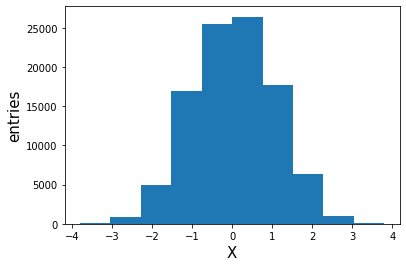

In [112]:
# This runs the above functions and gives the value of the integral and the acceptance ratio.
# The plot is the distribution generated according to the weight function
met_int(100000,0.2,0)
plt.ylabel('entries',fontsize = 15)
plt.xlabel('X',fontsize = 15)

Text(0.5, 0, 'k')

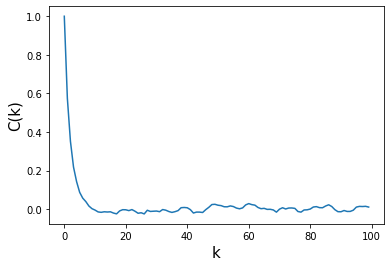

In [113]:
# Following is the plot of the autocorrelation function
auto_c(10000,1,0)
plt.ylabel('C(k)',fontsize = 15)
plt.xlabel('k',fontsize =15)

Variation of step size will be studied below.

Text(0, 0.5, 'value of integral')

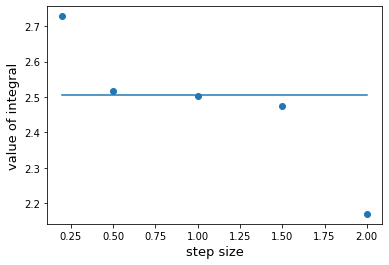

In [6]:
# Study of variation of step size to the value of the integral, acceptance ratio and efficiency.
def met_int2(N,d,ini): # This is to integrate the function and find the acceptance ratio
    domain = metropolis(N,d,ini)[0]
    sum_ = 0
    #normalization of weight function.
    norm = np.sqrt(2*np.pi)
    
    for i in domain:
        sum_ = sum_ + f(i)
    return [norm*(sum_/np.size(domain)),metropolis(N,d,ini)[1]]

val = np.sqrt(2*np.pi) # analytical value of the integral.

steps = [0.2,0.5,1,1.5,2]
var = [[],[],[]]
for i in steps:
    v = met_int2(100000,i,0)
    var[0].append(v[0])
    var[1].append(v[1])
    var[2].append(v[0]-val)
plt.scatter(steps,var[0])
plt.plot(steps,np.ones(5)*val)
plt.xlabel('step size',fontsize=13)
plt.ylabel('value of integral',fontsize = 13)

Text(0, 0.5, 'acceptance ratio, optimal = 0.5')

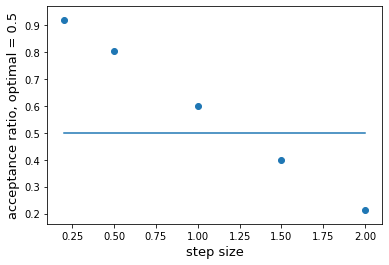

In [121]:
plt.scatter(steps,var[1])
plt.plot(steps,np.ones(5)*0.5)
plt.xlabel('step size',fontsize=13)
plt.ylabel('acceptance ratio, optimal = 0.5',fontsize = 13)

Text(0, 0.5, 'efficiency')

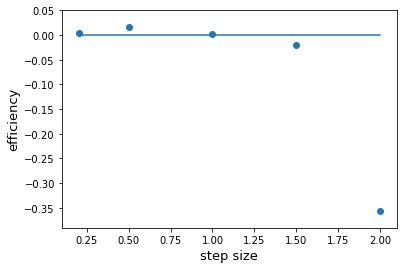

In [122]:
plt.scatter(steps,var[2])
plt.plot(steps,np.zeros(5))
plt.xlabel('step size',fontsize=13)
plt.ylabel('efficiency',fontsize = 13)

Text(0, 0.5, 'Auto correlation function')

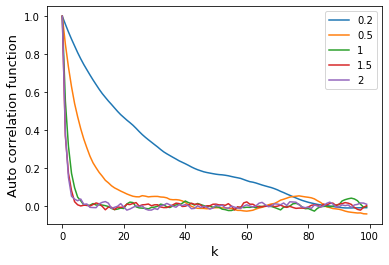

In [123]:
for i in steps:
    auto_c(10000,i,0)
plt.legend(steps)
plt.xlabel('k',fontsize=13)
plt.ylabel('Auto correlation function',fontsize = 13)

From the above plots, it is clear that the algorithm is most efficient for step size = 1. The auto correlation function should steeply reduce to 0 for better accuracy.

Study of variation of initial position.

In [9]:
init = [-0.5,-0.2,0,0.4,0.7]
var1 = [[],[],[]]
for i in init:
    v = met_int2(100000,1,i)
    var1[0].append(v[0])
    var1[1].append(v[1])
    var1[2].append(v[0]-val)

Text(0, 0.5, 'value of integral')

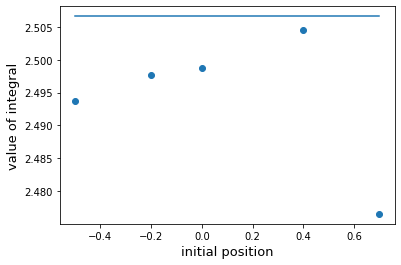

In [10]:
plt.scatter(init,var1[0])
plt.plot(init,np.ones(5)*val)
plt.xlabel('initial position',fontsize=13)
plt.ylabel('value of integral',fontsize = 13)

Text(0, 0.5, 'acceptance ratio')

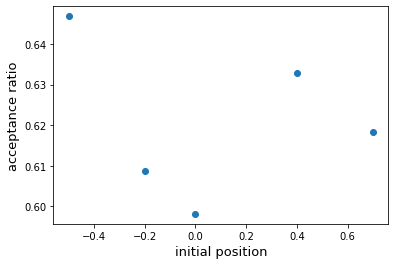

In [12]:
plt.scatter(init,var1[1])
plt.xlabel('initial position',fontsize=13)
plt.ylabel('acceptance ratio',fontsize = 13)

Text(0, 0.5, 'efficiency')

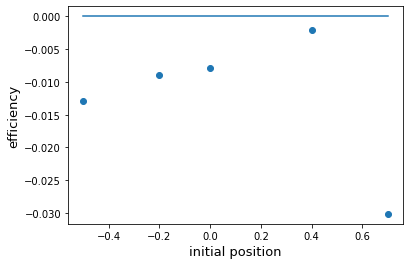

In [13]:
plt.scatter(init,var1[2])
plt.plot(init,np.zeros(5))
plt.xlabel('initial position',fontsize=13)
plt.ylabel('efficiency',fontsize = 13)

Text(0, 0.5, 'Auto correlation function')

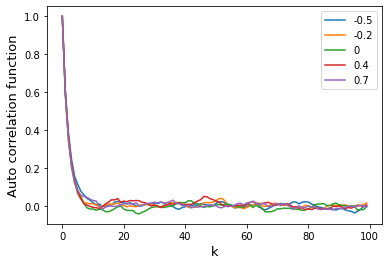

In [14]:
for i in init:
    auto_c(10000,1,i)
plt.legend(init)
plt.xlabel('k',fontsize=13)
plt.ylabel('Auto correlation function',fontsize = 13)

As shown by the above plots, the is not much variation with the initial position.

In [91]:
# Comparison with the method used in section 1 with w(x) = 1
def func(x):
    return (x**2)*np.e**(-(x**2)/2)

# The range considered is -10 to 10 because beyond this the function rapidly goes to 0.
print('Value of the integral is',int_w(-10,10,1000,func)[0])
print('sigma_I is',int_w(-10,10,100,func)[1])

Value of the integral is 2.6148280126242
sigma_I is -0.06377347793578703


In [134]:
# A comparison table for the 2 different methods varying N.
comp = np.zeros((6,3))
Ni = [1000,5000,10000,50000,100000,500000]
for i in range(len(Ni)):
    comp[i][0] = Ni[i]
    comp[i][1] = met_int2(Ni[i],1,0)[0]
    comp[i][2] = int_w(-10,10,Ni[i],func)[0]

comp_pd=pd.DataFrame(comp,columns = ["N","Metropolis","MC, w(x) = 1"])
comp_pd

,N,Metropolis,"MC, w(x) = 1"
0,1000.0,2.874735,2.345270
1,5000.0,2.364781,2.482526
2,10000.0,2.450987,2.525762
3,50000.0,2.478404,2.519708
4,100000.0,2.478930,2.496313
5,500000.0,2.494722,2.510159


# Question 3 - Ising model

The two dimensional Ising model will be analysed in this section considering a lattice of 20 $\times$ 20 spins. It will be seen that there exists a phase transtion at a finite temperature where we will get a non-zero magnetization for 0 external field. The Hamiltonian for this system is
$$H = -J \sum_{\alpha\beta}S_{\alpha}S_{\beta} - B \sum_{\alpha}S_{\alpha}$$
The codes below are as follows:
1. A 20 $\times$ 20 lattice is created.
2. A random initial starting configuration of spins is generated using the start_config function.
3. The functions which will calculate the energy of the system (energy_config) and magnetization (Mag) given a configuration (S) are defined.
4. The metropolis algorithm to find the next configuration is defined using the function MC_config. This function runs randomly over most of the lattice points 20 $\times$ 20 to create a new spin configuration which is weighted by $\omega(s) = \frac{e^{-\beta H(s)}}{Z}$. For metroplos algorithm, this gives,
$$r=\frac{e^{H_s}/Z}{e^{H}/Z} = e^{-2S_{\alpha}(Jf+B)}$$
5. Here, f is the sum of the spins of all the nearest neighbors.
6. This was repeated 1000 times to thermalize and then 100 times again to calculate and plot the various quantities.

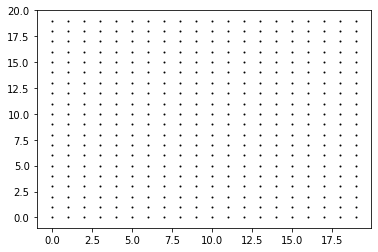

In [22]:
#Creating the 20*20 square lattice
#xp and yp give the coordinates of the points
xp = np.linspace(0,19,20)
yp = np.linspace(0,19,20)
for i in xp:
    plt.scatter(np.ones(20)*i,yp,s=1,c='k')

In [23]:
def start_config(d): # d = number of sites in one axis. here 20
    #Randomly assigning spins to create the starting configuration
    Si = np.zeros((d,d)) #creates a 20*20 array of 0.
    for i in range(d):
        for j in range(d):
            t = np.random.uniform(0,1) #random number
            if (t >= 0.5):
                Si[i,j] = 1
            elif (t < 0.5):
                Si[i,j] = -1
    return Si

In [24]:
np.sum(start_config(20))

8.0

In [25]:
def energy_config(S,J,B): # This function returns the energy of the configuration
    d = np.size(S[0])
    d = int(d)
    sum_ = 0
    for i in range(d):
        for j in range(d):
            f = S[(i+1)%d,j] + S[(i-1)%d,j] + S[i,(j+1)%d] + S[i,(j-1)%d]
            sum_ = sum_ + (-J*S[i,j]*f-B*S[i,j])
    return sum_

def Mag(S,J,B): # This function returns the magnetization
    return np.sum(S)

In [74]:
def MC_config(S,d,J,B,T): ''' Given a configuration this function returns a new configuration following the 
                             Metropolis algorithm'''
    N = d*d
    
    for i in range(d):
        for j in range(d):
            # random site
            a = np.random.randint(0,d)
            b = np.random.randint(0,d)
            
            Sf = S[a,b]*(-1) #fliping
            f = S[(a+1)%d,b] + S[(a-1)%d,b] + S[a,(b+1)%d] + S[a,(b-1)%d]
            #r = np.e**((S[a,b]*(-2)*(J*f+B))/T)
            c = 2*S[a,b]*(J*f+B)
            if (c < 0): # Metroplis algorithm.
                S[a,b] = Sf
            elif (np.random.uniform(0,1) < np.e**(-c/T)):
                S[a,b] = Sf
        
    return S

In [82]:
Nth = 1000 # steps to thermalization
Nmc = 1000 # steps of MC
T = np.linspace(1.3, 3.3, 32)

M, E, Cb, Chi = [],[],[],[]
d = 20 # Size of one axis of the lattice

for t in T:
    S = start_config(d)
    M1 = H1 = M2 = H2 = 0

    for i in range(Nth): # To thermalize
        MC_config(S,d,1,0,t)
        
    for i in range(Nmc): # MC steps. This simulation is done for J = 1 and B = 0.
        MC_config(S,d,1,0,t)
        mag = Mag(S,1,0)
        e = energy_config(S,1,0)
        
        H1 = H1 + e
        M1 = M1 + mag
        M2 = M2 + mag**2
        H2 = H2 + e**2
        
    M.append(np.abs(M1)/(Nmc*d*d))
    E.append(H1/(Nmc*d*d))
    Cb.append((H2/(Nmc*d*d) - (H1*H1)/(Nmc*Nmc*d*d))*(1/(t*t)))
    Chi.append((M2/(Nmc*d*d) - (M1*M1)/(Nmc*Nmc*d*d))*(1/t))
        

Text(0.5, 0, 'Temperature')

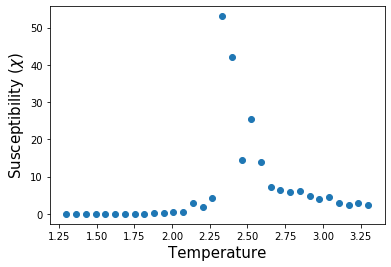

In [83]:
plt.scatter(T,Chi)
plt.ylabel('Susceptibility ($\chi$)',fontsize = 15)
plt.xlabel('Temperature',fontsize = 15)

Text(0.5, 0, 'Temperature')

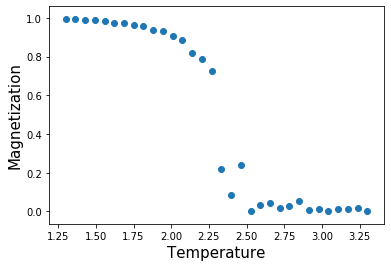

In [84]:
plt.scatter(T,M)
plt.ylabel('Magnetization',fontsize = 15)
plt.xlabel('Temperature',fontsize = 15)

Text(0.5, 0, 'Temperature')

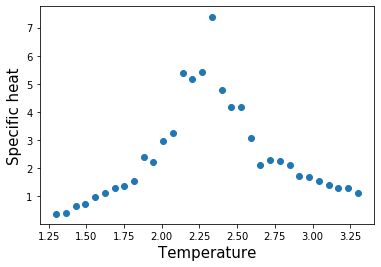

In [85]:
plt.scatter(T,Cb)
plt.ylabel('Specific heat',fontsize = 15)
plt.xlabel('Temperature',fontsize = 15)

Text(0.5, 0, 'Temperature')

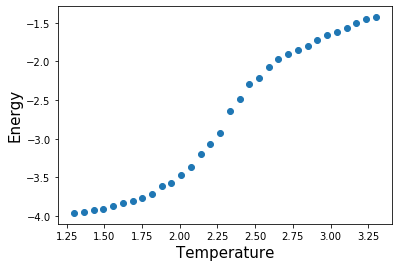

In [86]:
plt.scatter(T,E)
plt.ylabel('Energy',fontsize = 15)
plt.xlabel('Temperature',fontsize = 15)

In all the above plots, the divergence of susceptibility and specific heat and the appearence of non zero magnetization for 0 external field shows that this system undergoes a phase transition and the transition temperature is where these functions diverge or magnetization becomes non zero. From the above plots, $T_c$ can be guessed to be around 2.25 to 2.5 in units where $k_B$ = 1.

Now and external magnetic field will be turned on and the same functions will be plotted. B = 1. This is done for a 10 $\times$ 10 lattice.

In [75]:
# Considering B = 1 and J = 1 and 10*10 lattice
Nth = 1000 # steps to thermalization
Nmc = 1000 # steps of MC
T = np.linspace(1.3, 9, 40)

M, E, Cb, Chi = [],[],[],[]
d = 10

for t in T:
    S = start_config(10)
    M1 = H1 = M2 = H2 = 0

    for i in range(Nth): # To thermalize
        MC_config(S,10,1,1,t)
        
    for i in range(Nmc): # MC steps. This simulation is done for J = 1 and B = 0.
        MC_config(S,10,1,1,t)
        mag = Mag(S,1,1)
        e = energy_config(S,1,1)
        
        H1 = H1 + e
        M1 = M1 + mag
        M2 = M2 + mag**2
        H2 = H2 + e**2
        
    M.append(np.abs(M1)/(Nmc*d*d))
    E.append(H1/(Nmc*d*d))
    Cb.append((H2/(Nmc*d*d) - (H1*H1)/(Nmc*Nmc*d*d))*(1/(t*t)))
    Chi.append((M2/(Nmc*d*d) - (M1*M1)/(Nmc*Nmc*d*d))*(1/t))
        

Text(0.5, 0, 'Temperature')

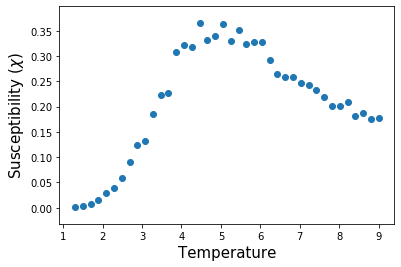

In [76]:
plt.scatter(T,Chi)
plt.ylabel('Susceptibility ($\chi$)',fontsize = 15)
plt.xlabel('Temperature',fontsize = 15)

Text(0.5, 0, 'Temperature')

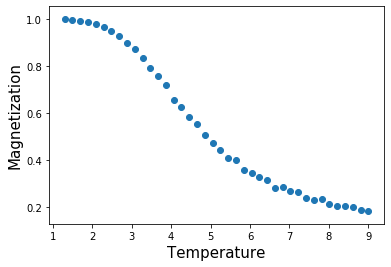

In [77]:
plt.scatter(T,M)
plt.ylabel('Magnetization',fontsize = 15)
plt.xlabel('Temperature',fontsize = 15)

Text(0.5, 0, 'Temperature')

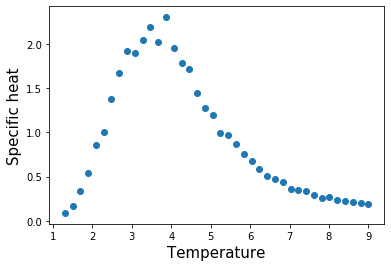

In [78]:
plt.scatter(T,Cb)
plt.ylabel('Specific heat',fontsize = 15)
plt.xlabel('Temperature',fontsize = 15)

Text(0.5, 0, 'Temperature')

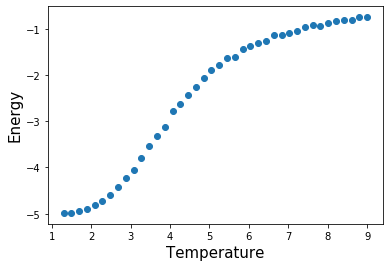

In [79]:
plt.scatter(T,E)
plt.ylabel('Energy',fontsize = 15)
plt.xlabel('Temperature',fontsize = 15)

Study of phase transition. The analytically found transition temperature for this model is 1/$\beta$ where $\beta$ = 2.269. At this critical temperature, starting from a random configuration, 1000 MC steps will be computed to find the final configuration to check for transition.

In [136]:
S = start_config(10)
T = 1/2.269
print(S)
for i in range(1000):
    S = MC_config(S,10,1,0,T)
print(S)

[[-1.  1. -1.  1. -1. -1.  1. -1. -1.  1.]
 [-1. -1. -1. -1. -1. -1. -1.  1. -1.  1.]
 [-1. -1. -1.  1. -1.  1.  1. -1. -1. -1.]
 [ 1. -1.  1. -1.  1. -1.  1.  1.  1. -1.]
 [ 1. -1. -1. -1.  1. -1.  1.  1.  1.  1.]
 [ 1.  1.  1. -1. -1. -1.  1. -1. -1. -1.]
 [ 1. -1. -1. -1. -1.  1.  1.  1.  1.  1.]
 [-1. -1.  1. -1. -1.  1. -1. -1.  1.  1.]
 [-1.  1.  1.  1.  1.  1.  1.  1. -1. -1.]
 [-1.  1.  1.  1. -1. -1. -1.  1. -1.  1.]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


Above gives the initial random spin configuration (10 $\times$ 10) and the configuration after 1000 MC steps. We see that all spins get aligned. This shows that a transition occurs in this model at the analytically found value of $T_c$. This is done for B = 0.